a. Top 5 states with highest number of Assault offenses registered in all the agency types except cities. (Show pivot of sub-types of Assault offenses)

b. Which category of crimes were most registered in universities?

c. Compare offenses at Michigan State University with offenses at all other universities.

d. Which provinces have state agencies with lowest number of digital offenses registered (Credit Card/Automated Teller Machine Fraud, Wire Fraud)

e. Which category of agency type and their respective agency names have the highest number of offenses registered per million people?

f. Geospatial visualization of the data showing the offence type with highest number of offences in that province (Hint: for each state find the offense type with highest number of offenses and create a geoplot)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("usfbidata.xlsx", header=None)
df = df[3:]
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
3,State,Agency Type,Agency Name,Population1,Crimes Against Persons,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
5,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
6,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
7,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
8,NaN,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
9,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
10,NaN,NaN,Arkadelphia,10698,274,35,178,61,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
11,NaN,NaN,Ashdown,4680,72,14,57,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
12,NaN,NaN,Atkins,3057,22,1,13,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols = df.shape[1]
for col in range(cols):
    if pd.isna(df.loc[3, col]):
        #print(df.loc[3, col-1])
        df.loc[3, col] = df.loc[3, col-1]

df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
3,State,Agency Type,Agency Name,Population1,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,...,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society
4,NaN,NaN,NaN,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
5,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
6,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
7,NaN,NaN,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,NaN,NaN,St. Croix Tribal,NaN,14,1,10,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,11
5240,1Population figures are published only for the...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5241,2This agency reported 24 Murder and Nonneglige...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5242,3Student enrollment figures were not available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in range(3):
    for row in df.index:
        if pd.isna(df.loc[row, col]):
            #print()
            df.loc[row, col] = df.loc[row-1, col]
    
df
    

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
3,State,Agency Type,Agency Name,Population1,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,...,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society
4,State,Agency Type,Agency Name,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
5,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
6,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
7,ARIZONA,Cities,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,WISCONSIN,Other Agencies - Tribal,St. Croix Tribal,NaN,14,1,10,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,11
5240,1Population figures are published only for the...,Other Agencies - Tribal,St. Croix Tribal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5241,2This agency reported 24 Murder and Nonneglige...,Other Agencies - Tribal,St. Croix Tribal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5242,3Student enrollment figures were not available.,Other Agencies - Tribal,St. Croix Tribal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.iloc[:-4, ]
df

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
3,State,Agency Type,Agency Name,Population1,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,Crimes Against Persons,...,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society,Crimes Against Society
4,State,Agency Type,Agency Name,NaN,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
5,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
6,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
7,ARIZONA,Cities,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,WISCONSIN,Nonmetropolitan Counties,Sauk,NaN,80,14,63,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5236,WISCONSIN,Nonmetropolitan Counties,Sawyer,NaN,79,21,56,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,15
5237,WISCONSIN,Nonmetropolitan Counties,Vilas,NaN,42,3,39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5238,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,NaN,56,14,39,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [ ]:
headers = list(df.loc[4, ])
for i, h in enumerate(headers):
    try:
        headers[i] = headers[i].replace('\n', "")
        headers[i] = headers[i].replace('/', "")
        headers[i] = headers[i].replace('-', "")
        #print(headers[i])
    except Exception as E:
        continue
headers
headers[3] = "Population"

In [ ]:
df = df.loc[5:]
df.columns = headers
df

,State,Agency Type,Agency Name,Population,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,Murder and Nonnegligent Manslaughter,...,GamblingOffenses,BettingWagering,OperatingPromotingAssistingGambling,GamblingEquipmentViolations,SportsTampering,PornographyObsceneMaterial,ProstitutionOffenses,Prostitution,Assistingor PromotingProstitution,WeaponLawViolations
5,ALABAMA,Cities,Hoover,82332,870,25,594,251,2,2,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,26
6,ARIZONA,Cities,Apache Junction,36986,559,96,381,82,1,1,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,25
7,ARIZONA,Cities,Gilbert,214264,1242,123,892,227,5,5,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,NaN,75
8,ARIZONA,Metropolitan Counties,Yuma2,NaN,555,94,376,85,26,26,...,NaN,NaN,NaN,NaN,NaN,5,2,1,1,40
9,ARKANSAS,Cities,Alma,5439,197,11,108,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,WISCONSIN,Nonmetropolitan Counties,Sauk,NaN,80,14,63,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
5236,WISCONSIN,Nonmetropolitan Counties,Sawyer,NaN,79,21,56,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,15
5237,WISCONSIN,Nonmetropolitan Counties,Vilas,NaN,42,3,39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
5238,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,NaN,56,14,39,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [ ]:
df.iloc[:, 3:] = df.iloc[:, 3:].astype('float')
df

/Users/naren/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/naren/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,State,Agency Type,Agency Name,Population,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,Murder and Nonnegligent Manslaughter,...,GamblingOffenses,BettingWagering,OperatingPromotingAssistingGambling,GamblingEquipmentViolations,SportsTampering,PornographyObsceneMaterial,ProstitutionOffenses,Prostitution,Assistingor PromotingProstitution,WeaponLawViolations
5,ALABAMA,Cities,Hoover,82332.0,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
6,ARIZONA,Cities,Apache Junction,36986.0,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
7,ARIZONA,Cities,Gilbert,214264.0,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
8,ARIZONA,Metropolitan Counties,Yuma2,NaN,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
9,ARKANSAS,Cities,Alma,5439.0,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,WISCONSIN,Nonmetropolitan Counties,Sauk,NaN,80.0,14.0,63.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5236,WISCONSIN,Nonmetropolitan Counties,Sawyer,NaN,79.0,21.0,56.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,15.0
5237,WISCONSIN,Nonmetropolitan Counties,Vilas,NaN,42.0,3.0,39.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
5238,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,NaN,56.0,14.0,39.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


a. Top 5 states with highest number of Assault offenses registered in all the agency types except cities. (Show pivot of sub-types of Assault offenses)

In [ ]:
df_a = df.copy()
df_afilt = df_a[df_a["Agency Type"] != "Cities"]
df_asum = df_afilt.loc[:, ["State", "AssaultOffenses"]].groupby("State").sum()
df_asum.sort_values("AssaultOffenses", ascending=False, inplace=True)

df_asum.head()

,AssaultOffenses
State,
SOUTH CAROLINA,52862.0
VIRGINIA,47129.0
TENNESSEE,33657.0
MICHIGAN,32420.0
OHIO,20224.0


Data: X: Population, Drug/Narcotic Offenses, Drug/Narcotic Violations, Drug Equipment Violations, Theft from Building, Theft from Coin-operated Machine, Theft from Motor Vehicle, Theft of Motor Vehicle Parts or Accessories. Y: Total number of offenses

b. Which category of crimes were most registered in universities?

In [ ]:
#Filtering for Universities and Colleges from Agency Type

category = df[df['Agency Type'] == 'Universities and Colleges']

#Dropping categorical fetatures such as State, Agency type, Agency Name, Population

category = category.iloc[: , 4:]

#Replacing all null values in numerical columns with 0

category = category.fillna(0)

#Converting to int

category.astype({col: int for col in category.columns[1:]})

#Get sum of individual columns

sum_column = category.sum(axis=0)

#Return category with largest crimes registered under Universities and Colleges

#sum_column = sum_column.nlargest(1)

pd.DataFrame(sum_column.sort_values(ascending=False)).iloc[1]



#Larceny-Theft Offenses crimes were reported at the highest with 20630 cases registered within Univeristies.

0    20630.0
Name: LarcenyTheftOffenses, dtype: float64

c. Compare offenses at Michigan State University with offenses at all other universities.


In [ ]:
#Task 1: C. Compare offenses at Michigan State University with offenses at all other universities.

plot = df[df['Agency Type'] == 'Universities and Colleges']
plot = plot.groupby('Agency Type')
plot = plot.fillna(0)

column_list = list(plot)
column_list.remove("Population")
plot["sum"] = plot[column_list].sum(axis=1)

#Rate of crime at all other universities university
comparison = [plot["Agency Name"], plot["sum"]]
headers = ["University Name", "Total Rate of Crime"]
comparison = pd.concat(comparison, axis=1, keys=headers)
comparison.head()

Michingan = comparison[comparison['University Name'] == 'Michigan State University']
mich = int(Michingan["Total Rate of Crime"])

comparison.drop(2075, inplace=True)

comparison["Michigan %"] = comparison["Total Rate of Crime"] * 100 / mich

comparison.sort_values("Michigan %", ascending=False, inplace=True)
comparison.head()


,University Name,Total Rate of Crime,Michigan %
2901,"Ohio State University, Main Campus, Columbus",6100.0,158.771473
355,Boulder,6062.0,157.782405
2083,Ann Arbor,4826.0,125.611661
4524,Virginia Commonwealth University,4446.0,115.720979
1285,University of Kentucky,3778.0,98.334201


d. Which provinces have state agencies with lowest number of digital offenses registered (Credit Card/Automated Teller Machine Fraud, Wire Fraud)

In [ ]:
df_d = df.copy()
df_dsum = df_d.loc[:, ["State", "Credit CardAutomatedTellerMachine Fraud","WireFraud"]].groupby("State").sum()
df_dsum["Total Digital Offense"] = df_dsum.iloc[1:].sum(axis=1)
df_dsum.sort_values("Total Digital Offense", inplace=True)

df_dsum.head()

,Credit CardAutomatedTellerMachine Fraud,WireFraud,Total Digital Offense
State,,,
DISTRICT OF COLUMBIA,0.0,0.0,0.0
MISSISSIPPI,85.0,4.0,89.0
VERMONT,122.0,23.0,145.0
ILLINOIS,209.0,0.0,209.0
MAINE,245.0,12.0,257.0


e. Which category of agency type and their respective agency names have the highest number of offenses registered per million people?

In [ ]:
df_e = df.copy()
df_e.iloc[:,3:] = df.iloc[:,3:].astype('float')
df_e["TotalOffenses"] = df_e.iloc[:, 4:].sum(axis=1,)

highest_offence = df_e[["Agency Type", "Agency Name", "Population", "TotalOffenses"]]
highest_offence["Population"] = highest_offence['Population'].apply(lambda x: x / (1000000))
highest_offence["Offence_per_Million"] = highest_offence['TotalOffenses'] / highest_offence['Population']
highest_offence.sort_values(["Offence_per_Million"], ascending=False).loc[:, ["Agency Type", "Agency Name"]].head(1)

,Agency Type,Agency Name
293,Cities,Lakeside


In [ ]:
df["TotalOffenses"] = df.iloc[:, 4:].sum(axis=1, )

<ipython-input-11-a639eb5c16e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalOffenses"] = df.iloc[:, 4:].sum(axis=1, )


In [ ]:
dh = ["Population", "Drug", "Theft"]
newheaders = list()
for h in headers:
    for d in dh:
        if d in h:
            newheaders.append(h)
            break

newheaders.remove("LarcenyTheftOffenses")
newheaders.remove("MotorVehicleTheft")
newheaders.append("TotalOffenses")

In [ ]:
df_data = df.loc[:, newheaders].copy()
df_data

,Population,TheftFromBuilding,TheftFromCoinoperatedMachine,TheftFromMotorVehicle,Theft ofMotorVehicleParts orAccessories,DrugNarcoticOffenses,DrugNarcoticViolations,DrugEquipmentViolations,TotalOffenses
5,82332.0,410.0,4.0,418.0,127.0,495.0,339.0,156.0,7616.0
6,36986.0,12.0,1.0,52.0,52.0,308.0,152.0,156.0,4485.0
7,214264.0,96.0,3.0,720.0,35.0,2069.0,979.0,1090.0,16612.0
8,NaN,NaN,NaN,8.0,4.0,437.0,208.0,229.0,4954.0
9,5439.0,39.0,NaN,39.0,NaN,66.0,44.0,22.0,1325.0
...,...,...,...,...,...,...,...,...,...
5235,NaN,110.0,NaN,36.0,8.0,196.0,95.0,101.0,2072.0
5236,NaN,29.0,NaN,28.0,8.0,55.0,32.0,23.0,1101.0
5237,NaN,NaN,NaN,3.0,1.0,49.0,49.0,NaN,604.0
5238,NaN,12.0,NaN,12.0,1.0,92.0,57.0,35.0,579.0


In [ ]:
df_data.dropna(axis=0, thresh=7, inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 5 to 5239
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Population                               2505 non-null   object 
 1   TheftFromBuilding                        3184 non-null   object 
 2   TheftFromCoinoperatedMachine             1066 non-null   object 
 3   TheftFromMotorVehicle                    3245 non-null   object 
 4   Theft ofMotorVehicleParts orAccessories  2803 non-null   object 
 5   DrugNarcoticOffenses                     3276 non-null   object 
 6   DrugNarcoticViolations                   3271 non-null   object 
 7   DrugEquipmentViolations                  2909 non-null   object 
 8   TotalOffenses                            3276 non-null   float64
dtypes: float64(1), object(8)
memory usage: 255.9+ KB


In [ ]:
df_data.drop("TheftFromCoinoperatedMachine", axis=1, inplace=True)

In [ ]:
for col in list(df_data.columns):
    df_data[col] = df_data[col].fillna(df_data[col].median())

df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 5 to 5239
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Population                               3276 non-null   float64
 1   TheftFromBuilding                        3276 non-null   float64
 2   TheftFromMotorVehicle                    3276 non-null   float64
 3   Theft ofMotorVehicleParts orAccessories  3276 non-null   float64
 4   DrugNarcoticOffenses                     3276 non-null   float64
 5   DrugNarcoticViolations                   3276 non-null   float64
 6   DrugEquipmentViolations                  3276 non-null   float64
 7   TotalOffenses                            3276 non-null   float64
dtypes: float64(8)
memory usage: 230.3 KB


array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'TheftFromBuilding'}>,
        <AxesSubplot:title={'center':'TheftFromMotorVehicle'}>],
       [<AxesSubplot:title={'center':'Theft ofMotorVehicleParts orAccessories'}>,
        <AxesSubplot:title={'center':'DrugNarcoticOffenses'}>,
        <AxesSubplot:title={'center':'DrugNarcoticViolations'}>],
       [<AxesSubplot:title={'center':'DrugEquipmentViolations'}>,
        <AxesSubplot:title={'center':'TotalOffenses'}>, <AxesSubplot:>]],
      dtype=object)

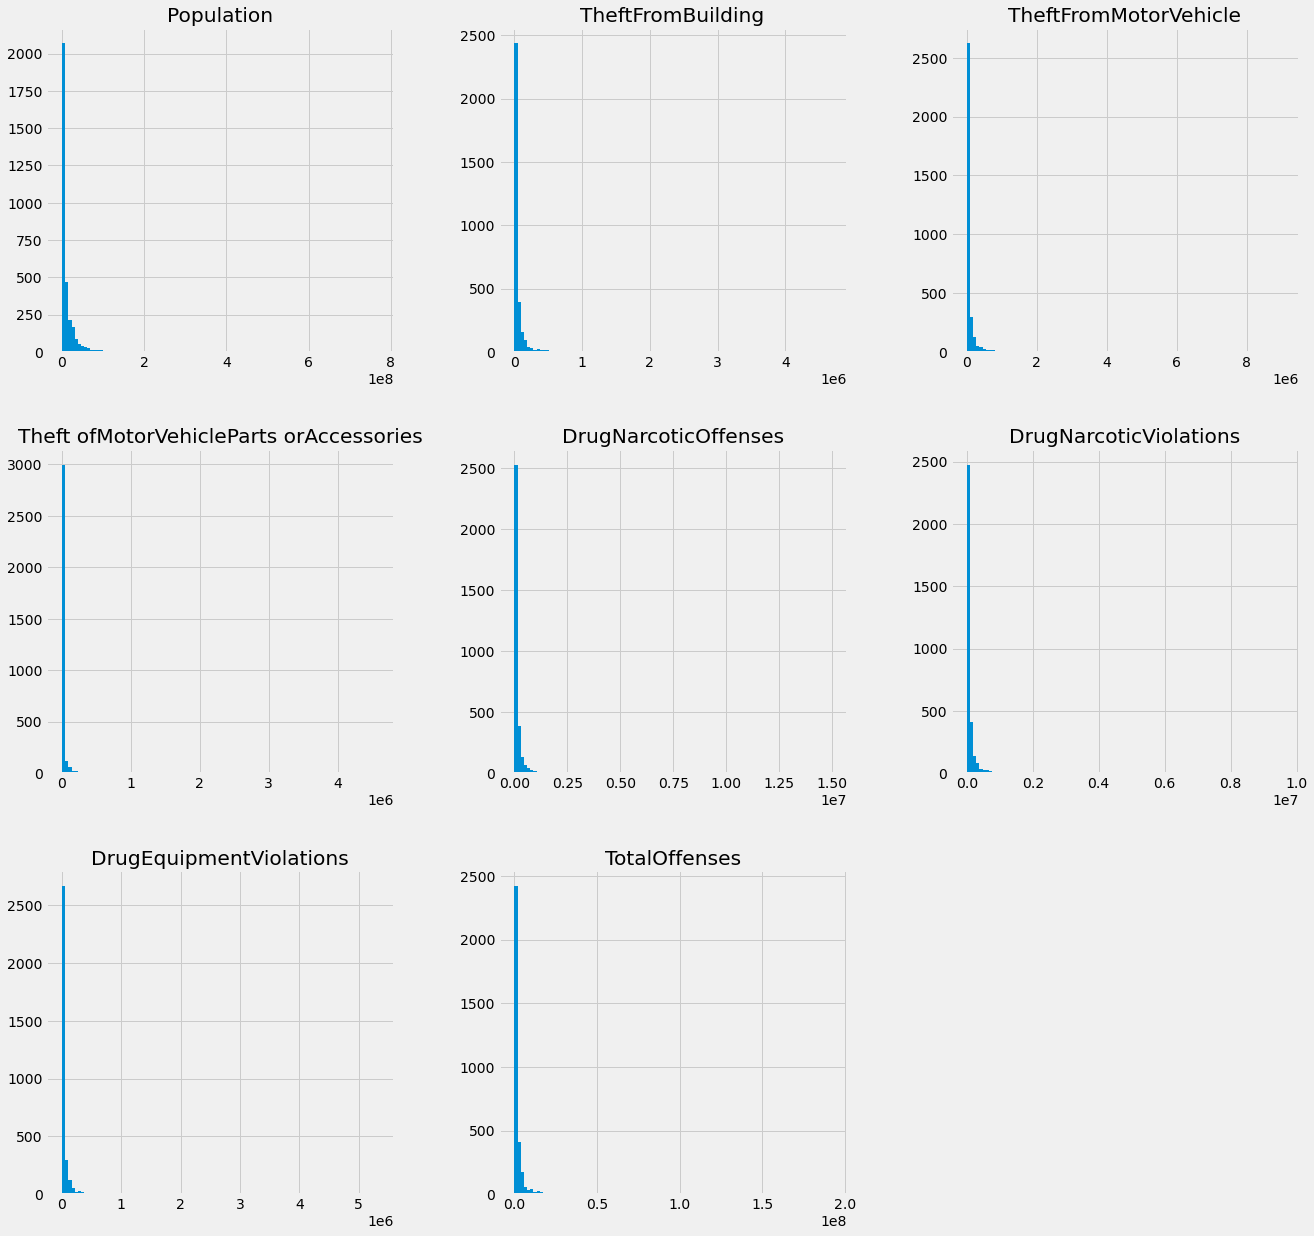

In [ ]:
(df_data * 1000).hist(bins=100, figsize=(20,20))

In [ ]:
from scipy import stats
z_scores = stats.zscore(df_data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df_data = df_data[filtered_entries]

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'TheftFromBuilding'}>,
        <AxesSubplot:title={'center':'TheftFromMotorVehicle'}>],
       [<AxesSubplot:title={'center':'Theft ofMotorVehicleParts orAccessories'}>,
        <AxesSubplot:title={'center':'DrugNarcoticOffenses'}>,
        <AxesSubplot:title={'center':'DrugNarcoticViolations'}>],
       [<AxesSubplot:title={'center':'DrugEquipmentViolations'}>,
        <AxesSubplot:title={'center':'TotalOffenses'}>, <AxesSubplot:>]],
      dtype=object)

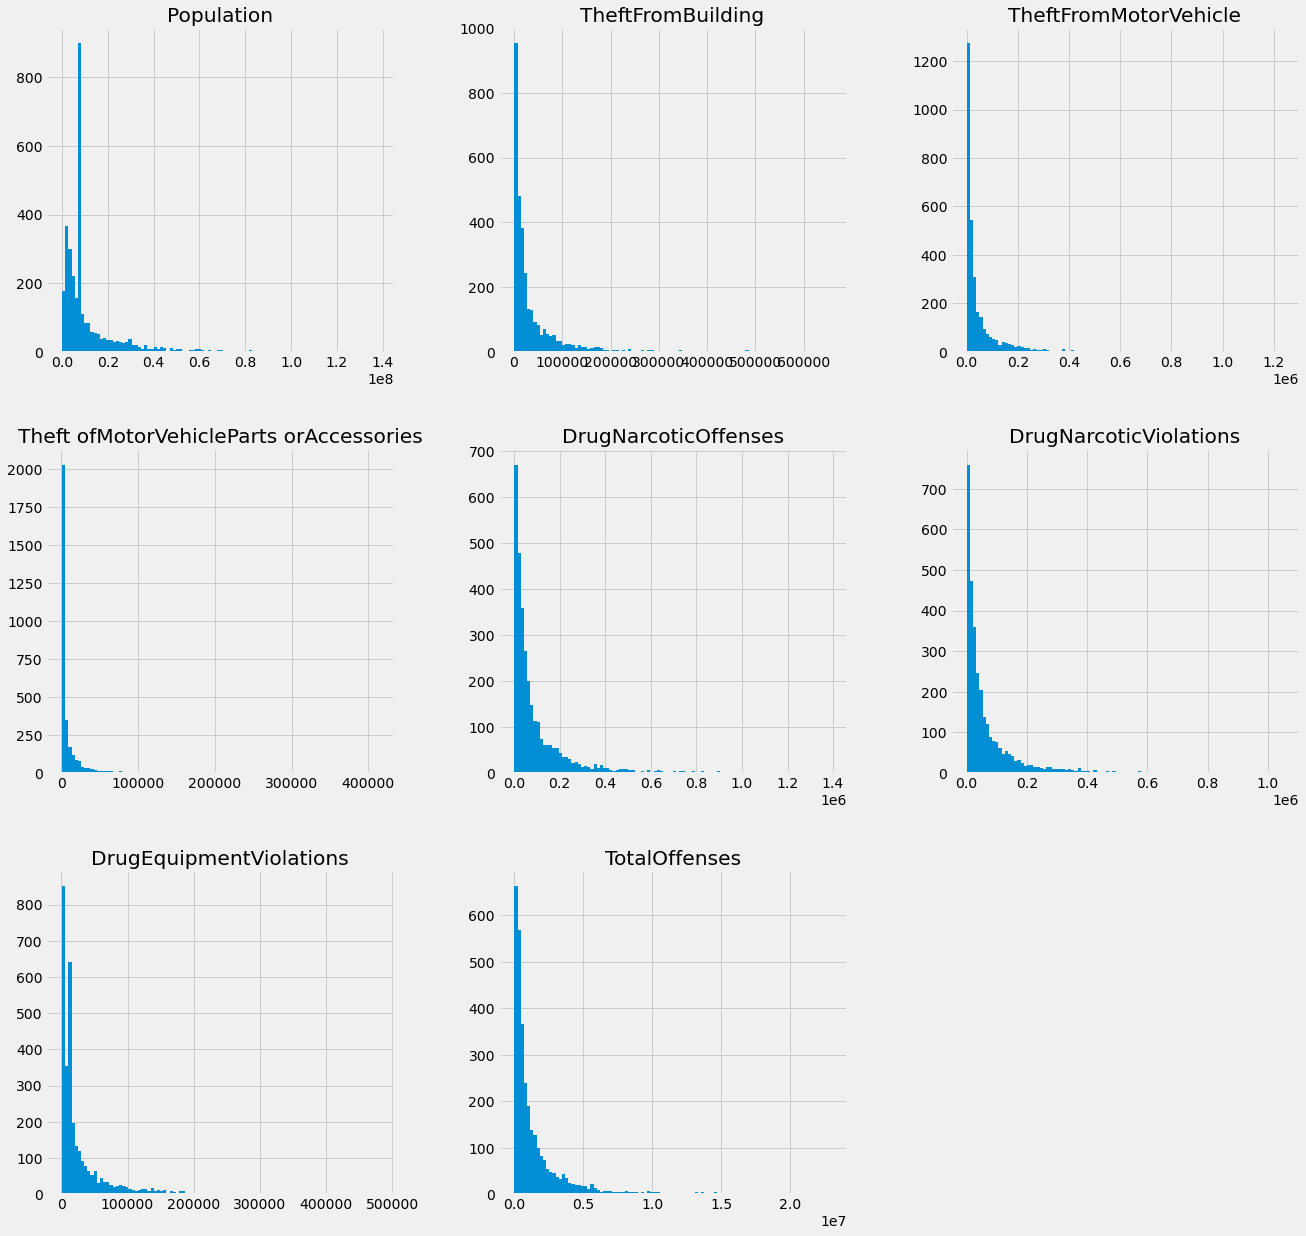

In [ ]:
(df_data * 1000).hist(bins=100, figsize=(20,20))

In [ ]:
corr = df_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Population,TheftFromBuilding,TheftFromMotorVehicle,Theft ofMotorVehicleParts orAccessories,DrugNarcoticOffenses,DrugNarcoticViolations,DrugEquipmentViolations,TotalOffenses
Population,1.00,0.56,0.72,0.59,0.63,0.61,0.57,0.72
TheftFromBuilding,0.56,1.00,0.64,0.59,0.60,0.59,0.52,0.68
TheftFromMotorVehicle,0.72,0.64,1.00,0.67,0.71,0.71,0.56,0.90
Theft ofMotorVehicleParts orAccessories,0.59,0.59,0.67,1.00,0.61,0.63,0.46,0.74
DrugNarcoticOffenses,0.63,0.60,0.71,0.61,1.00,0.97,0.87,0.83
DrugNarcoticViolations,0.61,0.59,0.71,0.63,0.97,1.00,0.71,0.85
DrugEquipmentViolations,0.57,0.52,0.56,0.46,0.87,0.71,1.00,0.63
TotalOffenses,0.72,0.68,0.90,0.74,0.83,0.85,0.63,1.00


In [ ]:
X = df_data.iloc[:, :-1]
y = df_data["TotalOffenses"]

print(X.shape)
print(y.shape)

(3197, 7)
(3197,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

steps = [("Scaler", StandardScaler()),
            ("PCA", PCA(n_components=0.95))]

preproc = Pipeline(steps=steps)

In [ ]:
X_red = preproc.fit_transform(X_train)
print(X_red.shape)

(2557, 5)


In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(n_jobs=-1)
LR.fit(X_red, y_train)

print("Training R Squared:", round(LR.score(X_red, y_train), 2))

y_train_pred = LR.predict(X_red)
print("Training MAE:", round(mean_absolute_error(y_train, y_train_pred), 2))

Training R Squared: 0.92
Training MAE: 382.23


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_test_red = preproc.fit_transform(X_test)
y_pred = LR.predict(X_test_red)

lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)

print("Mean Absolute Error:", round(lr_mae, 2))
print("Mean Squared Error:", round(lr_mse, 2))
print("Root Mean Squared Error:", round(np.sqrt(lr_mse), 2))
print("Test R squared:", round(LR.score(X_test_red, y_test), 2))

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(LR, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

print("Cross Validation Score:", round(np.mean(np.abs(scores)), 2))

Mean Absolute Error: 702.57
Mean Squared Error: 2163326.36
Root Mean Squared Error: 1470.83
Test R squared: 0.73
Cross Validation Score: 392.93


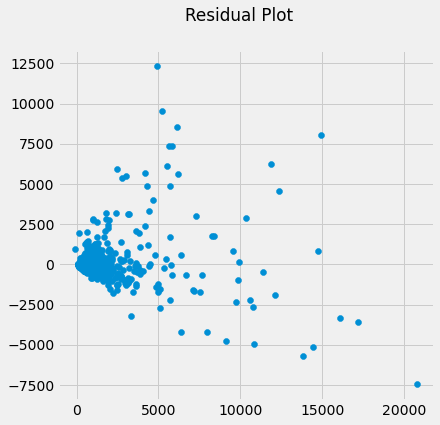

In [ ]:
res = list()
for i in range(len(y_pred)):
    res.append(list(y_test)[i] - y_pred[i])

plt.figure(figsize=(6, 6))
plt.scatter(y_pred, res)
plt.suptitle("Residual Plot")
plt.show()

The above residual plot is normally distributed which shows that the model performance is as expected

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor()
model_3.fit(X_red, y_train)
 
# predicting the output on the validation dataset
pred_3 = model_3.predict(X_test_red)

lr_mae = mean_absolute_error(y_test, pred_3)
lr_mse = mean_squared_error(y_test, pred_3)

print("Mean Absolute Error:", round(lr_mae, 2))
print("Mean Squared Error:", round(lr_mse, 2))
print("Root Mean Squared Error:", round(np.sqrt(lr_mse), 2))
print("Test R squared:", round(model_3.score(X_test_red, y_test), 2))

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model_3, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

print("Cross Validation Score:", round(np.mean(np.abs(scores)), 2))

Mean Absolute Error: 675.78
Mean Squared Error: 1945299.49
Root Mean Squared Error: 1394.74
Test R squared: 0.76
Cross Validation Score: 396.23


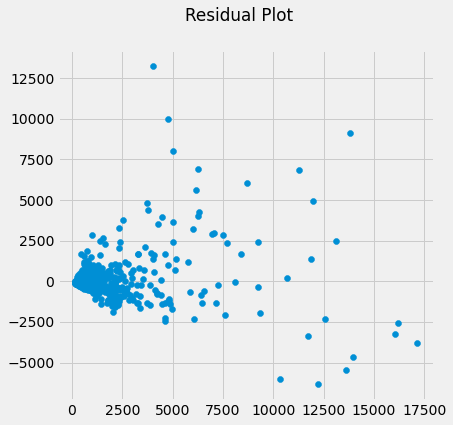

In [ ]:
res = list()
for i in range(len(y_pred)):
    res.append(list(y_test)[i] - pred_3[i])

plt.figure(figsize=(6, 6))
plt.scatter(pred_3, res)
plt.suptitle("Residual Plot")
plt.show()

In [ ]:
df.iloc[:, 21:46]

,Arson,Bribery,BurglaryBreaking &Entering,CounterfeitingForgery,DestructionDamageVandalism,Embezzlement,ExtortionBlackmail,FraudOffenses,FalsePretensesSwindleConfidenceGame,Credit CardAutomatedTellerMachine Fraud,...,Pursesnatching,Shoplifting,TheftFromBuilding,TheftFromCoinoperatedMachine,TheftFromMotorVehicle,Theft ofMotorVehicleParts orAccessories,AllOtherLarceny,MotorVehicleTheft,Robbery,StolenPropertyOffenses
5,1.0,NaN,391.0,55.0,280.0,70.0,NaN,202.0,38.0,109.0,...,2.0,550.0,410.0,4.0,418.0,127.0,197.0,88.0,46.0,29.0
6,1.0,NaN,237.0,58.0,447.0,NaN,1.0,162.0,52.0,62.0,...,NaN,193.0,12.0,1.0,52.0,52.0,415.0,68.0,21.0,28.0
7,25.0,2.0,728.0,163.0,2303.0,20.0,4.0,486.0,130.0,150.0,...,9.0,632.0,96.0,3.0,720.0,35.0,1053.0,171.0,59.0,100.0
8,10.0,3.0,363.0,26.0,542.0,NaN,1.0,192.0,83.0,48.0,...,NaN,34.0,NaN,NaN,8.0,4.0,596.0,75.0,10.0,24.0
9,1.0,NaN,99.0,15.0,97.0,NaN,NaN,13.0,1.0,10.0,...,2.0,59.0,39.0,NaN,39.0,NaN,126.0,7.0,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,1.0,NaN,117.0,5.0,283.0,8.0,NaN,76.0,28.0,20.0,...,NaN,13.0,110.0,NaN,36.0,8.0,237.0,25.0,2.0,4.0
5236,1.0,NaN,152.0,6.0,208.0,NaN,NaN,32.0,5.0,12.0,...,NaN,11.0,29.0,NaN,28.0,8.0,100.0,11.0,1.0,2.0
5237,NaN,NaN,52.0,4.0,68.0,NaN,NaN,24.0,7.0,5.0,...,NaN,4.0,NaN,NaN,3.0,1.0,94.0,6.0,1.0,NaN
5238,1.0,NaN,26.0,8.0,74.0,NaN,3.0,5.0,2.0,3.0,...,NaN,NaN,12.0,NaN,12.0,1.0,44.0,5.0,NaN,NaN


In [ ]:
df["By Person"] = df.iloc[:, 4:21].sum(axis=1)
df["By Property"] = df.iloc[:, 21:46].sum(axis=1)
df["By Society"] = df.iloc[:, 46:59].sum(axis=1)

5       1796.0
6       1208.0
7       2738.0
8       1305.0
9        403.0
         ...  
5235     265.0
5236     176.0
5237     110.0
5238     127.0
5239      28.0
Length: 5235, dtype: float64

In [ ]:
df.to_csv("data1.csv", index=False)